In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

Load in both datasets.

In [ ]:
field_data = pd.read_csv("cleaned_field_data.csv").drop_duplicates()
field_data

,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE
0,Alabama A & M University,Public,"Computer and Information Sciences, General.",Bachelors Degree,54300
1,Alabama A & M University,Public,Teacher Education and Professional Development...,Bachelors Degree,25400
2,Alabama A & M University,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,54500
3,Alabama A & M University,Public,Mechanical Engineering.,Bachelors Degree,45800
4,Alabama A & M University,Public,"Liberal Arts and Sciences, General Studies and...",Bachelors Degree,24000
...,...,...,...,...,...
19091,Inter American University of Puerto Rico - San...,"Private, nonprofit","Biology, General.",Bachelors Degree,12800
19092,Inter American University of Puerto Rico - San...,"Private, nonprofit","Psychology, General.",Bachelors Degree,12800
19093,Inter American University of Puerto Rico - San...,"Private, nonprofit",Criminal Justice and Corrections.,Bachelors Degree,17700
19094,Inter American University of Puerto Rico - San...,"Private, nonprofit","Registered Nursing, Nursing Administration, Nu...",Bachelors Degree,20900


In [ ]:
#Drops all rows that don't have a cost, because that will be needed later

institute_data = pd.read_csv("cleaned_institution_data.csv")
institute_data = institute_data.dropna(subset=["COSTT4_A"])
institute_data

,INSTNM,HIGHDEG,CONTROL,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,4,1,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182
1,University of Alabama at Birmingham,4,1,555.0,555.0,NaN,25.0,27.0,23.0,NaN,0.451035,0.513963,0.571058,24347.0,0.057
2,Amridge University,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160173,0.230769,0.332468,17680.0,0.110
3,University of Alabama in Huntsville,4,1,630.0,565.0,NaN,28.0,30.0,27.0,NaN,0.502003,0.548509,0.588311,23441.0,0.059
4,Alabama State University,4,1,480.0,465.0,NaN,18.0,17.0,17.0,NaN,0.136110,0.218587,0.289705,21476.0,0.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,South Georgia State College,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209108,0.266465,0.297257,14387.0,0.156
1880,Arizona State University-Skysong,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.535661,0.584856,0.626920,24636.0,0.062
1881,University of Florida-Online,3,1,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015
1882,Georgia Military College,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201250,0.255176,0.325070,12321.0,0.188


In [ ]:
#Merge dataset with institution dataset on the institution name 

merged = field_data.merge(institute_data.drop("CONTROL", axis=1), "inner", on="INSTNM")
merged

,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE,HIGHDEG,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,Public,"Computer and Information Sciences, General.",Bachelors Degree,54300,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182
1,Alabama A & M University,Public,Teacher Education and Professional Development...,Bachelors Degree,25400,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182
2,Alabama A & M University,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,54500,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182
3,Alabama A & M University,Public,Mechanical Engineering.,Bachelors Degree,45800,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182
4,Alabama A & M University,Public,"Liberal Arts and Sciences, General Studies and...",Bachelors Degree,24000,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18806,University of Florida-Online,Public,Criminology.,Bachelors Degree,34100,3,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015
18807,University of Florida-Online,Public,Sociology.,Bachelors Degree,30000,3,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015
18808,University of Florida-Online,Public,Public Health.,Bachelors Degree,29700,3,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015
18809,University of Florida-Online,Public,"Registered Nursing, Nursing Administration, Nu...",Bachelors Degree,58700,3,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015


In [ ]:
#Create a new score based on earnings divided by cost of that institution

earn_cost = merged["MD_EARN_WNE"]/ merged["COSTT4_A"]
merged["Raw Score"] = earn_cost

#Get the mean and standard deviation of each school's score(s) 
ec_mean = merged.groupby("INSTNM").mean()[["Raw Score"]].rename(columns={"Raw Score" : "Score Mean"}).reset_index()
ec_std = merged.groupby("INSTNM").std(ddof=0)[["Raw Score"]].rename(columns={"Raw Score" : "Score STD"}).reset_index()
merged = merged.merge(ec_mean, "outer").merge(ec_std, "outer")
merged

,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE,HIGHDEG,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,...,ACTMTMID,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3,Raw Score,Score Mean,Score STD
0,Alabama A & M University,Public,"Computer and Information Sciences, General.",Bachelors Degree,54300,4,475.0,465.0,414.0,18.0,...,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,2.414514,1.679551,0.571617
1,Alabama A & M University,Public,Teacher Education and Professional Development...,Bachelors Degree,25400,4,475.0,465.0,414.0,18.0,...,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,1.129441,1.679551,0.571617
2,Alabama A & M University,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,54500,4,475.0,465.0,414.0,18.0,...,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,2.423407,1.679551,0.571617
3,Alabama A & M University,Public,Mechanical Engineering.,Bachelors Degree,45800,4,475.0,465.0,414.0,18.0,...,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,2.036551,1.679551,0.571617
4,Alabama A & M University,Public,"Liberal Arts and Sciences, General Studies and...",Bachelors Degree,24000,4,475.0,465.0,414.0,18.0,...,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,1.067188,1.679551,0.571617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18806,University of Florida-Online,Public,Criminology.,Bachelors Degree,34100,3,635.0,605.0,570.0,26.0,...,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015,1.959207,2.046273,0.848692
18807,University of Florida-Online,Public,Sociology.,Bachelors Degree,30000,3,635.0,605.0,570.0,26.0,...,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015,1.723643,2.046273,0.848692
18808,University of Florida-Online,Public,Public Health.,Bachelors Degree,29700,3,635.0,605.0,570.0,26.0,...,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015,1.706406,2.046273,0.848692
18809,University of Florida-Online,Public,"Registered Nursing, Nursing Administration, Nu...",Bachelors Degree,58700,3,635.0,605.0,570.0,26.0,...,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015,3.372594,2.046273,0.848692


In [ ]:
#Earning cost score is a score that represents ability to pay based on how expensive the school is 
#Assumes the more money one makes relative to the cost of their school, the more likely they'll pay back their loans

merged["Earning Cost Score"] = (merged["Raw Score"] - merged["Score Mean"])/ merged["Score STD"] 

ec_max = merged["Earning Cost Score"].max()
ec_min = merged["Earning Cost Score"].min()
print(ec_min, ec_max)

#Scores above 0 get scaled between 0 and 1, scores below 0 get scaled between -1 and 0 
for index, row in merged.iterrows():
    if row["Earning Cost Score"] > 0:
        merged.loc[index, "Earning Cost Score"] = merged.loc[index, "Earning Cost Score"]/ec_max
    elif row["Earning Cost Score"] < 0:
        merged.loc[index, "Earning Cost Score"] = merged.loc[index, "Earning Cost Score"]/-ec_min
    else: 
        merged.loc[index, "Earning Cost Score"] = 0


#Clean up and take out intermediate columns
merged = merged.drop(["Raw Score", "Score Mean", "Score STD"], axis=1)
merged

-3.197110309787714 4.744749990989224


,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE,HIGHDEG,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3,Earning Cost Score
0,Alabama A & M University,Public,"Computer and Information Sciences, General.",Bachelors Degree,54300,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,0.270986
1,Alabama A & M University,Public,Teacher Education and Professional Development...,Bachelors Degree,25400,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,-0.301014
2,Alabama A & M University,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,54500,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,0.274265
3,Alabama A & M University,Public,Mechanical Engineering.,Bachelors Degree,45800,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,0.131628
4,Alabama A & M University,Public,"Liberal Arts and Sciences, General Studies and...",Bachelors Degree,24000,4,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182,-0.335078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18806,University of Florida-Online,Public,Criminology.,Bachelors Degree,34100,3,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015,-0.032088
18807,University of Florida-Online,Public,Sociology.,Bachelors Degree,30000,3,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015,-0.118904
18808,University of Florida-Online,Public,Public Health.,Bachelors Degree,29700,3,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015,-0.125257
18809,University of Florida-Online,Public,"Registered Nursing, Nursing Administration, Nu...",Bachelors Degree,58700,3,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015,0.329371


Meaning of repayment: the fraction of borrowers at an institution who are not in default on their federal loans and who are making progress in paying them down (i.e. have paid down at least $1 in the initial balance on their loans) after entering repayment (RPY_*YR_RT)

In [ ]:
#Rescaling repayment by multiplying earning cost score by repayment and adding it to repayment of that institution --> 
#Repayment is now based on major, not the institution as a whole
#Assumes people who earn more money are more likely to at least $1 of it towards repaying loans
#Treats original repayment as a baseline, percent of a major paying back can only be as low as institution as a whole and
#twice as much 

merged["RPY_1YR_NEW"] = merged["RPY_1YR_RT"] + (merged["Earning Cost Score"] * merged["RPY_1YR_RT"])
merged["RPY_3YR_NEW"] = merged["RPY_3YR_RT"] + (merged["Earning Cost Score"] * merged["RPY_3YR_RT"])
merged["RPY_5YR_NEW"] = merged["RPY_5YR_RT"] + (merged["Earning Cost Score"] * merged["RPY_5YR_RT"])

#By scaling this way, possible to have repayments be above 1 
merged["RPY_1YR_NEW"].max(), merged["RPY_3YR_NEW"].max(), merged["RPY_5YR_NEW"].max()

(1.4187619893876122, 1.48476147947702, 1.5164139479640464)

In [ ]:
#Makes sure all repayment values are below 1 
#Due to the nature of the scaling equation repayment can only be as low as 0, so don't have to make sure it is nonnegative

for index, row in merged.iterrows():
    if row["RPY_1YR_NEW"] > 1:
        merged.loc[index, "RPY_1YR_NEW"] = 1
    if row["RPY_3YR_NEW"] > 1:
        merged.loc[index, "RPY_3YR_NEW"] = 1
    if row["RPY_5YR_NEW"] > 1:
        merged.loc[index, "RPY_5YR_NEW"] = 1

merged 

,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE,HIGHDEG,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,...,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3,Earning Cost Score,RPY_1YR_NEW,RPY_3YR_NEW,RPY_5YR_NEW
0,Alabama A & M University,Public,"Computer and Information Sciences, General.",Bachelors Degree,54300,4,475.0,465.0,414.0,18.0,...,NaN,0.173469,0.253155,0.331126,22489.0,0.182,0.270986,0.220477,0.321757,0.420856
1,Alabama A & M University,Public,Teacher Education and Professional Development...,Bachelors Degree,25400,4,475.0,465.0,414.0,18.0,...,NaN,0.173469,0.253155,0.331126,22489.0,0.182,-0.301014,0.121253,0.176952,0.231452
2,Alabama A & M University,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,54500,4,475.0,465.0,414.0,18.0,...,NaN,0.173469,0.253155,0.331126,22489.0,0.182,0.274265,0.221046,0.322587,0.421942
3,Alabama A & M University,Public,Mechanical Engineering.,Bachelors Degree,45800,4,475.0,465.0,414.0,18.0,...,NaN,0.173469,0.253155,0.331126,22489.0,0.182,0.131628,0.196303,0.286478,0.374711
4,Alabama A & M University,Public,"Liberal Arts and Sciences, General Studies and...",Bachelors Degree,24000,4,475.0,465.0,414.0,18.0,...,NaN,0.173469,0.253155,0.331126,22489.0,0.182,-0.335078,0.115344,0.168329,0.220173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18806,University of Florida-Online,Public,Criminology.,Bachelors Degree,34100,3,635.0,605.0,570.0,26.0,...,9.0,0.640055,0.688023,0.717674,17405.0,0.015,-0.032088,0.619517,0.665945,0.694646
18807,University of Florida-Online,Public,Sociology.,Bachelors Degree,30000,3,635.0,605.0,570.0,26.0,...,9.0,0.640055,0.688023,0.717674,17405.0,0.015,-0.118904,0.563950,0.606214,0.632340
18808,University of Florida-Online,Public,Public Health.,Bachelors Degree,29700,3,635.0,605.0,570.0,26.0,...,9.0,0.640055,0.688023,0.717674,17405.0,0.015,-0.125257,0.559884,0.601843,0.627781
18809,University of Florida-Online,Public,"Registered Nursing, Nursing Administration, Nu...",Bachelors Degree,58700,3,635.0,605.0,570.0,26.0,...,9.0,0.640055,0.688023,0.717674,17405.0,0.015,0.329371,0.850871,0.914637,0.954056


In [ ]:
#Sort values to see what school/degree results in the highest and lowest repayment rates

merged.sort_values("RPY_1YR_NEW", ascending=False)

,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE,HIGHDEG,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,...,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3,Earning Cost Score,RPY_1YR_NEW,RPY_3YR_NEW,RPY_5YR_NEW
15219,Baylor University,"Private, nonprofit","General Sales, Merchandising and Related Marke...",Bachelors Degree,75800,4,640.0,640.0,585.0,29.0,...,8.0,0.704528,0.724330,0.775998,60619.0,0.036,0.448963,1.000000,1.000000,1.000000
9629,Stevens Institute of Technology,"Private, nonprofit",Civil Engineering.,Bachelors Degree,72700,4,675.0,730.0,NaN,32.0,...,NaN,0.865604,0.905134,0.912189,66642.0,0.009,0.163467,1.000000,1.000000,1.000000
5891,Louisiana State University and Agricultural & ...,Public,Mechanical Engineering.,Bachelors Degree,69400,4,590.0,590.0,NaN,26.0,...,NaN,0.738695,0.723630,0.742547,28539.0,0.040,0.444835,1.000000,1.000000,1.000000
2074,Colorado School of Mines,Public,Petroleum Engineering.,Bachelors Degree,68800,4,670.0,700.0,605.0,31.0,...,9.0,0.880993,0.905518,0.905458,33038.0,0.012,0.176499,1.000000,1.000000,1.000000
2073,Colorado School of Mines,Public,Mining and Mineral Engineering.,Bachelors Degree,71400,4,670.0,700.0,605.0,31.0,...,9.0,0.880993,0.905518,0.905458,33038.0,0.012,0.249607,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16361,Stevens-Henager College,"Private, nonprofit",Design and Applied Arts.,Bachelors Degree,21800,3,NaN,NaN,NaN,NaN,...,NaN,0.077813,0.116910,0.160784,31582.0,0.185,-0.325632,0.052474,0.078841,0.108428
3238,Altierus Career College-Tampa,"Private, nonprofit",Legal Support Services.,Bachelors Degree,24100,4,NaN,NaN,NaN,NaN,...,NaN,0.088698,0.123432,0.166542,26136.0,0.244,-0.450285,0.048758,0.067852,0.091550
14486,Benedict College,"Private, nonprofit",Communication and Media Studies.,Bachelors Degree,17100,3,NaN,NaN,NaN,NaN,...,NaN,0.076890,0.134161,0.172428,33055.0,0.185,-0.383696,0.047388,0.082684,0.106268
11886,Central State University,Public,Journalism.,Bachelors Degree,19100,3,405.0,390.0,NaN,16.0,...,NaN,0.092413,0.169338,0.222354,18737.0,0.269,-0.529230,0.043505,0.079719,0.104678


In [ ]:
#Got all rows for UC Berkeley to demonstrate the differences in repayment based on major

berk = merged.loc[merged['INSTNM'].str.contains("University of California-Berkeley")]
berk

,INSTNM,CONTROL,CIPDESC,CREDDESC,MD_EARN_WNE,HIGHDEG,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,...,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3,Earning Cost Score,RPY_1YR_NEW,RPY_3YR_NEW,RPY_5YR_NEW
1202,University of California-Berkeley,Public,Natural Resources Conservation and Research.,Bachelors Degree,44100,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,-0.037758,0.728514,0.771414,0.771525
1203,University of California-Berkeley,Public,Architecture.,Bachelors Degree,47900,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,0.012771,0.766770,0.811922,0.812039
1204,University of California-Berkeley,Public,Area Studies.,Bachelors Degree,37400,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,-0.137750,0.652810,0.691252,0.691351
1205,University of California-Berkeley,Public,"Ethnic, Cultural Minority, Gender, and Group S...",Bachelors Degree,41600,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,-0.075069,0.700266,0.741503,0.741609
1206,University of California-Berkeley,Public,Communication and Media Studies.,Bachelors Degree,43800,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,-0.042235,0.725124,0.767824,0.767935
1207,University of California-Berkeley,Public,Computer Science.,Bachelors Degree,114800,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,0.685532,1.000000,1.000000,1.000000
1208,University of California-Berkeley,Public,Chemical Engineering.,Bachelors Degree,72700,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,0.262165,0.955587,1.000000,1.000000
1209,University of California-Berkeley,Public,Civil Engineering.,Bachelors Degree,66000,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,0.194789,0.904576,0.957843,0.957981
1210,University of California-Berkeley,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,116600,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,0.703633,1.000000,1.000000,1.000000
1211,University of California-Berkeley,Public,Mechanical Engineering.,Bachelors Degree,71900,4,695.0,730.0,695.0,33.0,...,NaN,0.757101,0.801684,0.801799,36739.0,0.02,0.254120,0.949496,1.000000,1.000000


In [ ]:
berk[["INSTNM", "CONTROL", "CIPDESC", "MD_EARN_WNE","RPY_1YR_RT", "RPY_3YR_RT","RPY_5YR_RT","RPY_1YR_NEW","RPY_3YR_NEW", "RPY_5YR_NEW"]][10:20:2]

,INSTNM,CONTROL,CIPDESC,MD_EARN_WNE,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_1YR_NEW,RPY_3YR_NEW,RPY_5YR_NEW
1212,University of California-Berkeley,Public,"Linguistic, Comparative, and Related Language ...",25100,0.757101,0.801684,0.801799,0.513831,0.544089,0.544167
1214,University of California-Berkeley,Public,Non-Professional General Legal Studies (Underg...,44100,0.757101,0.801684,0.801799,0.728514,0.771414,0.771525
1216,University of California-Berkeley,Public,Rhetoric and Composition/Writing Studies.,34900,0.757101,0.801684,0.801799,0.624562,0.661341,0.661436
1218,University of California-Berkeley,Public,Cell/Cellular Biology and Anatomical Sciences.,34900,0.757101,0.801684,0.801799,0.624562,0.661341,0.661436
1220,University of California-Berkeley,Public,Applied Mathematics.,61500,0.757101,0.801684,0.801799,0.870315,0.921564,0.921697


In [ ]:
#Selected top 5 UC Berkeley majors based on repayment rate in year 1 

berk_3 = berk.sort_values("RPY_1YR_NEW",ascending=False)[5:10:2][["CIPDESC", "RPY_1YR_NEW", "RPY_3YR_NEW", "RPY_5YR_NEW"]].rename(columns={"RPY_1YR_NEW":1,"RPY_3YR_NEW":3,"RPY_5YR_NEW":5})
berk_3

,CIPDESC,1,3,5
1209,Civil Engineering.,0.904576,0.957843,0.957981
1232,Economics.,0.881735,0.933657,0.933791
1236,"Social Sciences, Other.",0.821588,0.869968,0.870093


In [ ]:
#Reorient table so can use it for visualizations

berk_T = berk_3.T
berk_T.columns = berk_T.iloc[0]
berk_T = berk_T.drop("CIPDESC")
berk_T

CIPDESC,Civil Engineering.,Economics.,"Social Sciences, Other."
1,0.904576,0.881735,0.821588
3,0.957843,0.933657,0.869968
5,0.957981,0.933791,0.870093


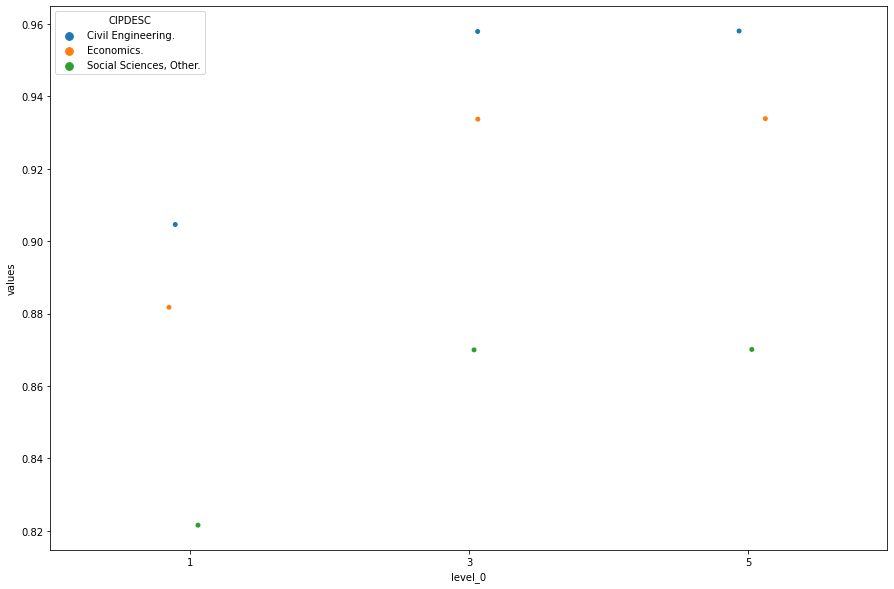

In [ ]:
#Plotting visualization of the different majors and their repayment rates

plt.figure(figsize=[15,10])
stack = berk_T.stack()
stack.name = 'values'
stack_tidy=stack.reset_index()
sns.stripplot(data= stack_tidy,hue='CIPDESC',x='level_0',y='values');